<a href="https://colab.research.google.com/github/mikemaid/Notebook/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.datasets import mnist
from keras.optimizers import SGD

In [3]:
# Load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [4]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [5]:
# Reshape
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [6]:
# Label Encoding 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train.shape, y_test.shape)

(60000, 10) (10000, 10)


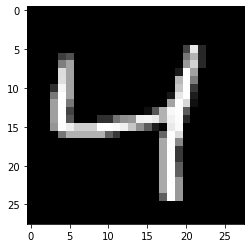

In [7]:
# Some examples
plt.imshow(X_train[2][:,:,0],cmap='gray')
plt.show()

In [8]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [9]:
model = Sequential()
#
model.add(Conv2D(32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2)) #decreased droupout
#
model.add(Conv2D(32, kernel_size = (3,3),padding = 'Same', #increased filter 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))
#
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))
# fully connected
model.add(Flatten())
model.add(Dense(100, activation = "relu")) #decreased input
model.add(Dropout(0.2)) #decreased dropout
model.add(Dense(10, activation = "softmax"))

opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer = opt, loss = "categorical_crossentropy", metrics=["accuracy"])

history = model.fit(datagen.flow(X_train, y_train, batch_size=250), epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
240/240 [==============================] - 104s 366ms/step - loss: 1.9881 - accuracy: 0.2714 - val_loss: 0.2251 - val_accuracy: 0.9378
Epoch 2/15
240/240 [==============================] - 87s 362ms/step - loss: 0.5095 - accuracy: 0.8374 - val_loss: 0.0991 - val_accuracy: 0.9673
Epoch 3/15
240/240 [==============================] - 87s 364ms/step - loss: 0.3092 - accuracy: 0.9049 - val_loss: 0.0703 - val_accuracy: 0.9783
Epoch 4/15
240/240 [==============================] - 87s 364ms/step - loss: 0.2442 - accuracy: 0.9255 - val_loss: 0.0571 - val_accuracy: 0.9823
Epoch 5/15
240/240 [==============================] - 87s 363ms/step - loss: 0.2106 - accuracy: 0.9344 - val_loss: 0.0510 - val_accuracy: 0.9839
Epoch 6/15
240/240 [==============================] - 87s 362ms/step - loss: 0.1837 - accuracy: 0.9440 - val_loss: 0.0405 - val_accuracy: 0.9871
Epoch 7/15
240/240 [==============================] - 87s 361ms/step - loss: 0.1708 - accuracy: 0.9477 - val_loss: 0.0384 - val_a

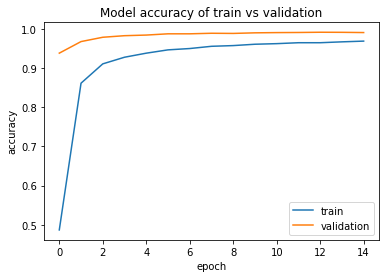

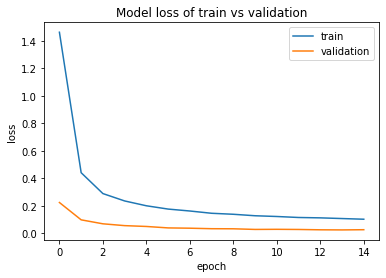

In [10]:
# # Plot the loss and accuracy curves for training and validation 
# plt.plot(history.history['val_loss'], color='b', label="validation loss")
# plt.title("Test Loss")
# plt.xlabel("Number of Epochs")
# plt.ylabel("Loss")
# plt.legend()
# plt.show()

###########################################
#Plot the Graph
H = history
acc = H.history["accuracy"]
val_acc = H.history['val_accuracy']
loss = H.history['loss']
val_loss = H.history['val_loss']
epochs = range(1, len(acc) + 1)
# Accuracy Curves
plt.figure(1)
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('Model accuracy of train vs validation')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.savefig('acc.png')
plt.show()
plt.figure(2)
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Model loss of train vs validation')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.savefig('loss.png')
plt.show() 

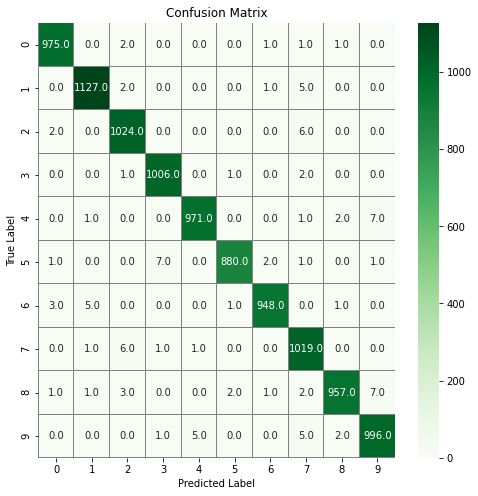

In [11]:
# confusion matrix
# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()